In [2]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.9 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from linearmodels.panel import PanelOLS
from math import log
import statsmodels.api as sm

In [5]:
df = pd.read_csv('/content/ukrainian_manufacturers_data.csv')

Firstly, let's take a look at our data. We have the following columns within our table:


*   **category**: the category of pet food product. The categories are wet, dry cats and dogs, treats.
*   **manufacturer/importer**: name of the company that is responsible for manufacturing the pet food products.
*  **brand**: brand of the pet food products.
*   **pet_type**: the type of pet for which the food is intended. The types are cats, dogs.
*   **price_segment**: the price segment of the pet food product (economy, middle, premium)
intended. The types are cats, dogs.
*   **package_type**: the type of packaging used for the pet food products (can, pack, pouch, sack).
*   **export**: a binary variable indicating whether the product was exported or no.
*   **january_2021_units - june_2023_units**: the number of units sold in the given period.
*   **january_2021_tons - june_2023_tons**: the number of tons sold in the given period.
*   **january_2021_mil_uah - june_2023_mil_uah**: sales data in millions of hryvnias in the given period.

In [6]:
df

,category,manufacturer/importer,brand,pet_type,price_segment,package_type,export,january_2021_units,february_2021_units,march_2021_units,...,september_2022_mil_uah,october_2022_mil_uah,november_2022_mil_uah,december_2022_mil_uah,january_2023_mil_uah,february_2023_mil_uah,march_2023_mil_uah,april_2023_mil_uah,may_2023_mil_uah,june_2023_mil_uah
0,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,can,1,2 291.00,4 132.00,2 386.00,...,0.21,0.07,0.02,0.03,0.07,0.07,0.04,0.08,0.14,0.20
1,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,can,0,67 295.00,72 150.00,204 350.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,pouch,1,64 392.00,123 816.00,115 104.00,...,5.04,2.45,1.88,1.26,1.30,3.79,2.34,3.60,4.63,2.53
3,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,pouch,0,2 078 129.00,2 368 494.00,2 758 730.00,...,48.14,72.78,63.56,71.26,62.50,72.53,78.63,71.93,81.09,73.25
4,wet,TOV_KORMOTECH,CLUB_4_PAWS,dogs,middle,can,1,1 079.00,3 413.00,912,...,0.14,0.12,0.04,0.07,0.05,0.09,0.08,0.11,0.13,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,veterinary_medicine,TOV_BORYSFEND_TRADE,BIOSTIM_4,cats,NaN,NaN,0,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,veterinary_medicine,TOV_BORYSFEND_TRADE,BIOSTIM_4,dogs,NaN,NaN,0,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,vitamins_and_supplements,TOV_PTF_TECHNO,Home_Food,cats,premium,plastic_jar,0,143,101,113,...,0.03,0.02,0.02,0.01,0.02,0.03,0.02,0.04,0.02,0.03
198,vitamins_and_supplements,TOV_PTF_TECHNO,Home_Food,dogs,premium,plastic_jar,0,200,164,159,...,0.05,0.05,0.05,0.04,0.04,0.06,0.05,0.07,0.07,0.07


In [7]:
for col in df.columns[7:]:
  df[col] = df[col].replace({"\u202f": ""}, regex=True).astype(float)

Now let's drop all the Null values we have within our table, so that we can build models and continue analyzing our data.

In [8]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,category,manufacturer/importer,brand,pet_type,price_segment,package_type,export,january_2021_units,february_2021_units,march_2021_units,...,september_2022_mil_uah,october_2022_mil_uah,november_2022_mil_uah,december_2022_mil_uah,january_2023_mil_uah,february_2023_mil_uah,march_2023_mil_uah,april_2023_mil_uah,may_2023_mil_uah,june_2023_mil_uah
0,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,can,1,2291.00,4132.00,2386.00,...,0.21,0.07,0.02,0.03,0.07,0.07,0.04,0.08,0.14,0.20
1,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,pouch,1,64392.00,123816.00,115104.00,...,5.04,2.45,1.88,1.26,1.30,3.79,2.34,3.60,4.63,2.53
2,wet,TOV_KORMOTECH,CLUB_4_PAWS,cats,middle,pouch,0,2078129.00,2368494.00,2758730.00,...,48.14,72.78,63.56,71.26,62.50,72.53,78.63,71.93,81.09,73.25
3,wet,TOV_KORMOTECH,CLUB_4_PAWS,dogs,middle,can,1,1079.00,3413.00,912.00,...,0.14,0.12,0.04,0.07,0.05,0.09,0.08,0.11,0.13,0.12
4,wet,TOV_KORMOTECH,CLUB_4_PAWS,dogs,middle,pouch,1,23064.00,20472.00,34200.00,...,1.52,0.58,0.30,0.39,0.37,0.92,0.72,0.63,1.08,0.51
5,wet,TOV_KORMOTECH,CLUB_4_PAWS,dogs,middle,pouch,0,303288.00,288024.00,394728.00,...,11.00,11.32,12.80,9.67,11.43,13.83,13.52,13.84,15.79,17.09
6,wet,TOV_KORMOTECH,OPTIMEAL,cats,premium,can,1,2376.00,6584.00,6958.00,...,0.26,0.04,0.10,0.22,0.85,0.17,0.55,0.06,0.33,0.70
7,wet,TOV_KORMOTECH,OPTIMEAL,cats,premium,can,0,54417.00,44107.00,56812.00,...,4.01,3.39,3.87,4.71,4.39,5.71,6.50,6.52,7.60,6.97
8,wet,TOV_KORMOTECH,OPTIMEAL,cats,premium,pouch,1,25680.00,63024.00,34344.00,...,1.95,1.85,0.92,2.08,1.52,1.65,1.54,1.44,1.04,1.86
9,wet,TOV_KORMOTECH,OPTIMEAL,cats,premium,pouch,0,296522.00,233043.00,401853.00,...,8.27,7.42,11.39,7.23,5.25,5.78,6.07,6.38,9.23,10.11


Let's take a look at the plot of means values of a volume corresponding to the time period. On this plot, the x-axis shows the months labeled from 1 to 30 where the 13 month is February 2022 and y-axis shows the mean value of volume in tons within this time period. Looking at the plot, one can observe that there was a significant decrease in volume in December 2022 (two months before the full-scale invasion) and then relatively quickly the price has stabilized.

In [9]:
mean_value = []
for column in df.columns[37:67]:
  mean_value.append(df[column].mean())
mean_value = np.array(mean_value)

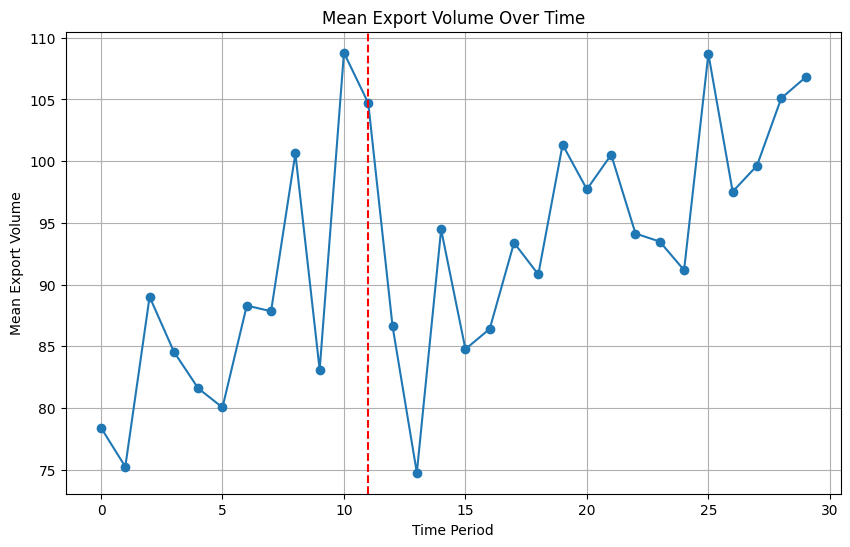

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(mean_value, marker='o')

# Customize plot
plt.xlabel('Time Period')
plt.ylabel('Mean Export Volume')
plt.title('Mean Export Volume Over Time')
plt.grid(True)
plt.axvline(x=11, color='red', linestyle='--')
plt.show()

To use different methods and models for the panel data, we need to transform it a bit. We have 30 months for one observation, so we would transform our table and add new columns such as observation and time period.

In [11]:
column_names = ['export_volume_units', 'units_increase', 'export_volume_tons', 'price', 'price_per_unit', 'war', 'category', 'manufacturer', 'pet_type', 'price_segment', 'package_type', 'export', 'observation', 'time-period']
df1 = pd.DataFrame(columns=column_names)
for i in range(57):
  row_data = df.loc[i]

  values = row_data[['january_2021_units', 'february_2021_units', 'march_2021_units', 'april_2021_units', 'may_2021_units', 'june_2021_units',
                   'july_2021_units', 'august_2021_units', 'september_2021_units', 'october_2021_units', 'november_2021_units', 'december_2021_units',
                   'january_2022_units', 'february_2022_units', 'march_2022_units', 'april_2022_units', 'may_2022_units', 'june_2022_units',
                   'july_2022_units', 'august_2022_units', 'september_2022_units', 'october_2022_units', 'november_2022_units', 'december_2022_units',
                   'january_2023_units', 'february_2023_units', 'march_2023_units', 'april_2023_units', 'may_2023_units', 'june_2023_units']].tolist()

  values1 = row_data[['january_2021_tons', 'february_2021_tons', 'march_2021_tons', 'april_2021_tons', 'may_2021_tons', 'june_2021_tons',
                   'july_2021_tons', 'august_2021_tons', 'september_2021_tons', 'october_2021_tons', 'november_2021_tons', 'december_2021_tons',
                   'january_2022_tons', 'february_2022_tons', 'march_2022_tons', 'april_2022_tons', 'may_2022_tons', 'june_2022_tons',
                   'july_2022_tons', 'august_2022_tons', 'september_2022_tons', 'october_2022_tons', 'november_2022_tons', 'december_2022_tons',
                   'january_2023_tons', 'february_2023_tons', 'march_2023_tons', 'april_2023_tons', 'may_2023_tons', 'june_2023_tons']].tolist()

  price = row_data[['january_2021_mil_uah', 'february_2021_mil_uah', 'march_2021_mil_uah', 'april_2021_mil_uah', 'may_2021_mil_uah', 'june_2021_mil_uah',
                   'july_2021_mil_uah', 'august_2021_mil_uah', 'september_2021_mil_uah', 'october_2021_mil_uah', 'november_2021_mil_uah', 'december_2021_mil_uah',
                   'january_2022_mil_uah', 'february_2022_mil_uah', 'march_2022_mil_uah', 'april_2022_mil_uah', 'may_2022_mil_uah', 'june_2022_mil_uah',
                   'july_2022_mil_uah', 'august_2022_mil_uah', 'september_2022_mil_uah', 'october_2022_mil_uah', 'november_2022_mil_uah', 'december_2022_mil_uah',
                   'january_2023_mil_uah', 'february_2023_mil_uah', 'march_2023_mil_uah', 'april_2023_mil_uah', 'may_2023_mil_uah', 'june_2023_mil_uah']].tolist()

  stable = row_data[['category', 'manufacturer/importer', 'pet_type', 'price_segment','package_type', 'export']].tolist()
  units = []
  for j in range(30):
    row = []
    value_to_clean = values[j]
    if isinstance(value_to_clean, str):
      cleaned_value = float(value_to_clean.replace('\u202f', ''))
    else:
      cleaned_value = float(value_to_clean)
    row.append(cleaned_value)
    units.append(cleaned_value)
    if j  >= 1:
      row.append(cleaned_value/units[j-1] - 1)
    else:
      row.append(0)

    value_to_clean1 = values1[j]
    if isinstance(value_to_clean1, str):
      cleaned_value1 = float(value_to_clean1.replace('\u202f', ''))
    else:
      cleaned_value1 = float(value_to_clean1)
    row.append(cleaned_value1)
    row.append(price[j])
    price_per_unit = (price[j] / cleaned_value) * 1000000
    row.append(price_per_unit)
    if j <= 13:
      row.append(0)
    else:
      row.append(1)
    row.extend(stable)
    row.append(i+1)
    row.append(j+1)

    df1.loc[(30*i)+j] = row
df1.head()


,export_volume_units,units_increase,export_volume_tons,price,price_per_unit,war,category,manufacturer,pet_type,price_segment,package_type,export,observation,time-period
0,2291.0,0.000000,3.44,0.17,74.203405,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,1
1,4132.0,0.803579,5.94,0.29,70.183930,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,2
2,2386.0,-0.422556,6.04,0.29,121.542330,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,3
3,5756.0,1.412406,9.80,0.48,83.391244,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,4
4,4904.0,-0.148019,6.51,0.31,63.213703,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,5


On the following plots we can take a look at the distribution of the different package types, price segments and pet types.

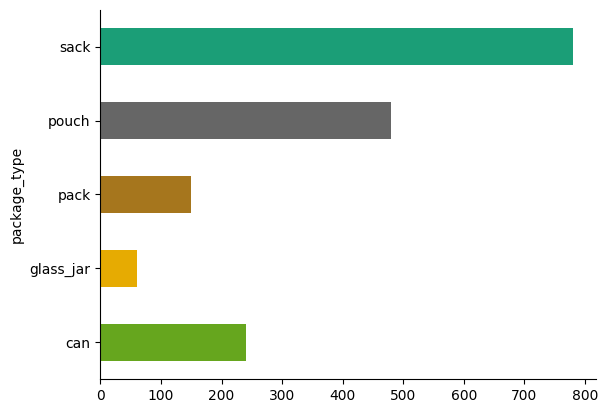

In [12]:
dark2_palette = sns.color_palette('Dark2')
custom_palette = dark2_palette[4:] + dark2_palette[:10]

df1.groupby('package_type').size().plot(kind='barh', color=custom_palette)
plt.gca().spines[['top', 'right',]].set_visible(False)

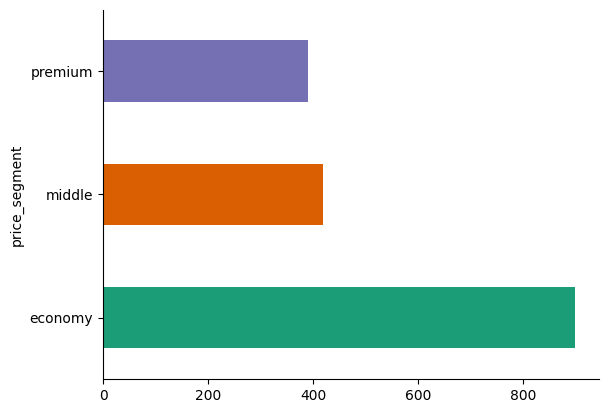

In [13]:
df1.groupby('price_segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

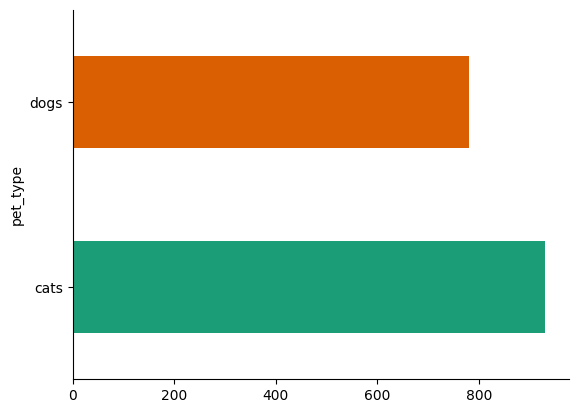

In [14]:
df1.groupby('pet_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Now let's divide our whole dataset into export and internal market datasets.

### Export

In [19]:
df_export = df1[df1['export'] == 1]
df_export = df_export.reset_index(drop=True)
df_export.to_csv('df_export.csv', index=False)
df_export

,export_volume_units,units_increase,export_volume_tons,price,price_per_unit,war,category,manufacturer,pet_type,price_segment,package_type,export,observation,time-period
0,2291.0,0.000000,3.44,0.17,74.203405,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,1
1,4132.0,0.803579,5.94,0.29,70.183930,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,2
2,2386.0,-0.422556,6.04,0.29,121.542330,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,3
3,5756.0,1.412406,9.80,0.48,83.391244,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,4
4,4904.0,-0.148019,6.51,0.31,63.213703,0,wet,TOV_KORMOTECH,cats,middle,can,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1060.0,1.334802,0.03,0.01,9.433962,1,treats,TOV_KORMOTECH,dogs,middle,pack,1,55,26
596,1468.0,0.384906,0.08,0.02,13.623978,1,treats,TOV_KORMOTECH,dogs,middle,pack,1,55,27
597,1800.0,0.226158,0.09,0.02,11.111111,1,treats,TOV_KORMOTECH,dogs,middle,pack,1,55,28
598,2130.0,0.183333,0.05,0.02,9.389671,1,treats,TOV_KORMOTECH,dogs,middle,pack,1,55,29


For export there are 20 differnet groups.

In [16]:
len(df_export['observation'].unique())

20

 The price is highly correlated with the export volume, which is actually pretty expected. The same observation are going to be seen while analyzing the results of fixed affects model.

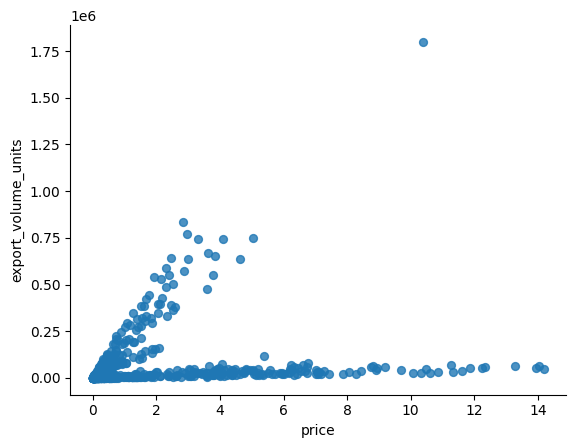

In [17]:
df_export.plot(kind='scatter', x='price', y='export_volume_units', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Internal market

Now let's consider the data from internal market.

In [20]:
df_internal = df1[df1['export'] == 0]
df_internal = df_internal.reset_index(drop=True)
df_internal = df_internal.rename(columns={'export_volume_units': 'volume_units', 'export_volume_tons': 'volume_tons'})
df_internal

,volume_units,units_increase,volume_tons,price,price_per_unit,war,category,manufacturer,pet_type,price_segment,package_type,export,observation,time-period
0,2078129.00,0.000000,199.41,15.93,7.665549,0,wet,TOV_KORMOTECH,cats,middle,pouch,0,3,1
1,2368494.00,0.139724,225.97,18.76,7.920645,0,wet,TOV_KORMOTECH,cats,middle,pouch,0,3,2
2,2758730.00,0.164761,265.81,21.12,7.655697,0,wet,TOV_KORMOTECH,cats,middle,pouch,0,3,3
3,2491802.00,-0.096758,239.90,18.58,7.456451,0,wet,TOV_KORMOTECH,cats,middle,pouch,0,3,4
4,3016509.00,0.210573,287.21,23.39,7.753996,0,wet,TOV_KORMOTECH,cats,middle,pouch,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,922.00,-0.023822,0.07,0.06,65.075922,1,treats,TOV_PTF_TECHNO,dogs,premium,pack,0,57,26
1106,1053.60,0.142733,0.08,0.08,75.930144,1,treats,TOV_PTF_TECHNO,dogs,premium,pack,0,57,27
1107,951.00,-0.097380,0.07,0.07,73.606730,1,treats,TOV_PTF_TECHNO,dogs,premium,pack,0,57,28
1108,1500.42,0.577729,0.12,0.09,59.983205,1,treats,TOV_PTF_TECHNO,dogs,premium,pack,0,57,29


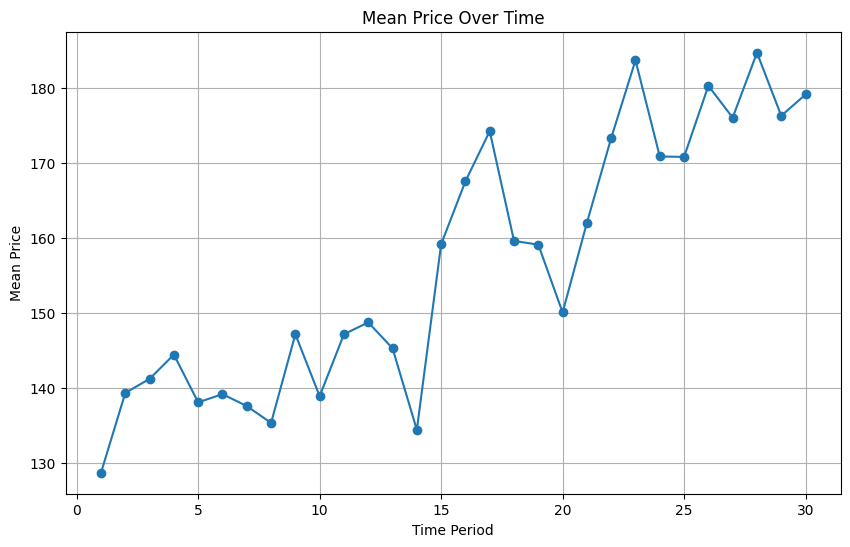

In [21]:
mean_price = df_internal.groupby('time-period')['price_per_unit'].mean()

# Plot the mean export volume over time
plt.figure(figsize=(10, 6))
plt.plot(mean_price.index, mean_price.values, marker='o')

# Customize plot
plt.xlabel('Time Period')
plt.ylabel('Mean Price')
plt.title('Mean Price Over Time')
plt.grid(True)
plt.show()


One can observe that the price of the dry pet food have started to increase from March 2022. It can be due to the fact that there was some companies, apparently on the frontline regions of Ukraine, that stopped producing pet food with the beginning of the war. So companies in other regions had the opportunity to raise prices because of increase in demand.

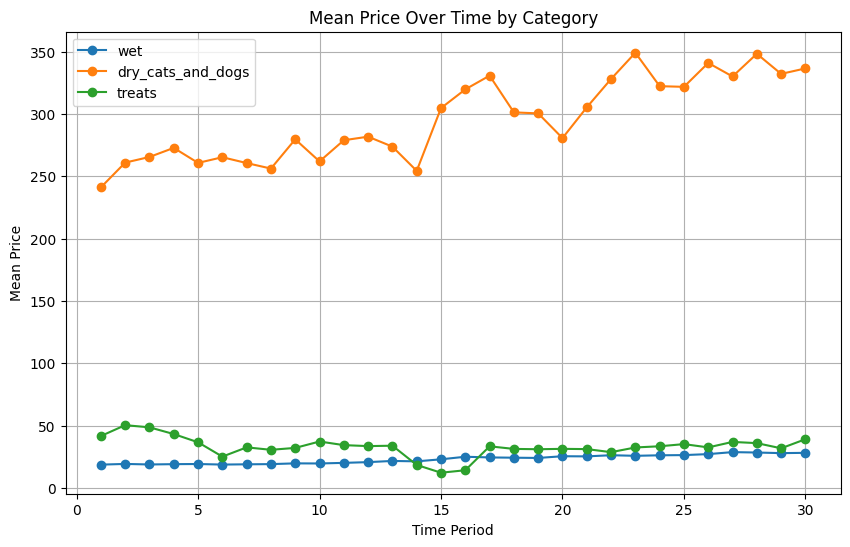

In [22]:
unique_categories = df_internal['category'].unique()

plt.figure(figsize=(10, 6))
for category in unique_categories:
    mean_price = df_internal[df_internal['category'] == category].groupby('time-period')['price_per_unit'].mean()
    plt.plot(mean_price.index, mean_price.values, marker='o', label=category)

# Customize plot
plt.xlabel('Time Period')
plt.ylabel('Mean Price')
plt.title('Mean Price Over Time by Category')
plt.legend()
plt.grid(True)
plt.show()


We need to transform all categorical variables.

In [23]:
for col in ['category', 'manufacturer', 'pet_type', 'price_segment', 'package_type']:
  one_hot_encoded = pd.get_dummies(df_internal[col], prefix=col)
  df_encoded = pd.concat([df_internal, one_hot_encoded], axis=1)
  df_internal = df_encoded
  df_encoded.drop(columns=[col], inplace=True)


df_internal.to_csv('df_internal.csv', index=False)
df_internal

,volume_units,units_increase,volume_tons,price,price_per_unit,war,export,observation,time-period,category_dry_cats_and_dogs,...,pet_type_cats,pet_type_dogs,price_segment_economy,price_segment_middle,price_segment_premium,package_type_can,package_type_glass_jar,package_type_pack,package_type_pouch,package_type_sack
0,2078129.00,0.000000,199.41,15.93,7.665549,0,0,3,1,False,...,True,False,False,True,False,False,False,False,True,False
1,2368494.00,0.139724,225.97,18.76,7.920645,0,0,3,2,False,...,True,False,False,True,False,False,False,False,True,False
2,2758730.00,0.164761,265.81,21.12,7.655697,0,0,3,3,False,...,True,False,False,True,False,False,False,False,True,False
3,2491802.00,-0.096758,239.90,18.58,7.456451,0,0,3,4,False,...,True,False,False,True,False,False,False,False,True,False
4,3016509.00,0.210573,287.21,23.39,7.753996,0,0,3,5,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,922.00,-0.023822,0.07,0.06,65.075922,1,0,57,26,False,...,False,True,False,False,True,False,False,True,False,False
1106,1053.60,0.142733,0.08,0.08,75.930144,1,0,57,27,False,...,False,True,False,False,True,False,False,True,False,False
1107,951.00,-0.097380,0.07,0.07,73.606730,1,0,57,28,False,...,False,True,False,False,True,False,False,True,False,False
1108,1500.42,0.577729,0.12,0.09,59.983205,1,0,57,29,False,...,False,True,False,False,True,False,False,True,False,False
